## Importing Packages

In [63]:
# Data Manipulation
import numpy as np
import pandas as pd
import random 
# Visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
# Cointegration test
from statsmodels.tsa.vector_ar.vecm import coint_johansen
# Robustness analysis
import statsmodels.api as sm
# Machine learning
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import OPTICS
# Other
import datetime as dt
import time
plt.style.use('ggplot')

## Data Manipulation

##### 取得所有股票收盤價

In [64]:
# from finlab import data
# df = data.get('price:收盤價')
# df.to_csv("close.csv", index = 'date')  
df = pd.read_csv('close.csv')
df.index = pd.to_datetime(df['date'])
df.sort_index(inplace = True)  # Sort the index of a DataFrame
df = df.drop(columns = 'date')
df.tail(5)

,0015,0050,0051,0052,0053,0054,0055,0056,0057,0058,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2024-09-30,NaN,183.95,81.60,177.10,97.6,NaN,29.35,38.66,134.50,NaN,...,20.40,48.95,28.75,25.50,14.35,65.2,36.40,222.0,NaN,16.95
2024-10-01,NaN,183.60,81.60,179.05,98.7,NaN,29.25,38.57,136.25,NaN,...,20.50,48.25,28.35,25.50,14.25,65.2,36.20,229.5,26.25,16.55
2024-10-04,NaN,183.60,80.30,179.25,98.5,NaN,29.05,38.35,135.70,NaN,...,20.60,47.80,26.95,25.00,14.20,64.8,37.00,223.0,26.25,16.55
2024-10-07,NaN,188.15,81.55,184.15,100.3,NaN,29.45,38.64,138.40,NaN,...,20.65,48.45,27.50,24.95,14.20,64.8,36.45,223.5,26.40,16.35
2024-10-08,NaN,187.25,81.10,183.65,100.5,NaN,29.30,38.43,138.10,NaN,...,20.55,47.95,26.80,25.25,14.15,64.5,35.55,215.0,26.50,16.10


#### 取得市值資料

In [65]:
market = pd.read_csv('market_value.csv')
market.index = pd.to_datetime(market['date'])
market.sort_index(inplace = True)
market = market.drop(columns = 'date')
market.tail(5)

,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2018-12-24,1.828685e+11,1.159699e+11,1.076945e+10,1.232053e+10,2.954587e+09,4.753215e+09,9.752614e+09,1.148763e+10,6.144000e+09,2.710520e+10,...,1.778446e+09,4.509627e+10,3.486148e+09,460927320.0,1.321241e+09,6.314070e+09,1.331386e+09,1.379295e+10,9.809010e+08,1.046555e+09
2018-12-25,1.831239e+11,1.136169e+11,1.057575e+10,1.225517e+10,2.946493e+09,4.650627e+09,9.552413e+09,1.120929e+10,6.120000e+09,2.671123e+10,...,1.778446e+09,4.454448e+10,3.458034e+09,447287634.0,1.326227e+09,6.059410e+09,1.321065e+09,1.336128e+10,9.960176e+08,1.037533e+09
2018-12-26,1.808253e+11,1.122723e+11,1.045954e+10,1.228785e+10,2.954587e+09,4.667725e+09,9.724014e+09,1.105747e+10,6.216000e+09,2.631726e+10,...,1.783901e+09,4.444415e+10,3.458034e+09,441643626.0,1.346170e+09,5.744830e+09,1.300423e+09,1.299127e+10,9.607455e+08,1.046555e+09
2018-12-27,1.808253e+11,1.127766e+11,1.049828e+10,1.235321e+10,2.954587e+09,4.719019e+09,9.724014e+09,1.113338e+10,6.228000e+09,2.635666e+10,...,1.767535e+09,4.494578e+10,3.500205e+09,450579972.0,1.346170e+09,5.887140e+09,1.253980e+09,1.309405e+10,1.004416e+09,1.042044e+09
2018-12-28,1.818469e+11,1.141211e+11,1.053701e+10,1.235321e+10,2.970777e+09,4.719019e+09,9.695414e+09,1.125990e+10,6.240000e+09,2.639606e+10,...,1.778446e+09,4.489562e+10,3.500205e+09,446817300.0,1.346170e+09,5.932080e+09,1.248819e+09,1.336128e+10,1.051445e+09,1.033022e+09


In [66]:
top_50_stocks = []

for date, row in market.iterrows():
    # 挑選出該天市值前 50 名的股票
    top_50 = row.dropna().nlargest(50)
    # 將結果轉換成兩列（日期，股票），並存入列表
    top_50_stocks.extend([(date, stock) for stock in top_50.index])

MarketComposition = pd.DataFrame(top_50_stocks, columns=['Date', 'Symbols'])
MarketComposition.index = pd.to_datetime(MarketComposition['Date'])
MarketComposition = MarketComposition.drop(columns = 'Date')
MarketComposition = MarketComposition[(MarketComposition.index >= '2013-06-30') & (MarketComposition.index <= '2018-12-31')].copy()
MarketComposition

,Symbols
Date,
2013-07-01,2330
2013-07-01,2317
2013-07-01,2412
2013-07-01,6505
2013-07-01,1303
...,...
2018-12-28,9910
2018-12-28,2890
2018-12-28,1102


#### Splitting in-sample and out-of-sample data
- In-sample: 1 year
- Out-of-sample: 6 months

In [67]:
df = df.copy()

inSample = {}
outofSample = {}
update_date = pd.Timestamp('2014-06-30')
count = 1
while update_date <= pd.Timestamp('2018-12-31'):  # 市值資料到 2018-12-31
    inSample_mask = (df.index > (update_date - pd.DateOffset(months=12))) & (df.index <= (update_date))  # DateOffset is an object used to create date offsets in pandas
    inSample[count] = df.loc[inSample_mask]  # key:count, value:closing price of all stocks in the inSample（it's a dataframe)

    outofSample_mask = (df.index > (update_date)) & (df.index <= (update_date + pd.DateOffset(months=6)))
    outofSample[count] = df.loc[outofSample_mask]
   
    count += 1
    update_date += pd.DateOffset(months=6)
# In-sample tail
print("In-sample tail:\n", inSample[10].iloc[:, :5].tail())

# Out-of-sample head
print("Out-of-sample head:\n", outofSample[10].iloc[:, :5].head())

In-sample tail:
             0015   0050   0051   0052   0053
date                                        
2018-12-24   NaN  74.70  28.39  47.51  30.18
2018-12-25   NaN  73.75  27.93  46.57  29.87
2018-12-26   NaN  73.55  28.14  46.93  29.98
2018-12-27   NaN  75.05  28.33  48.05  30.32
2018-12-28   NaN  75.50  28.30  48.11  30.50
Out-of-sample head:
             0015   0050   0051   0052   0053
date                                        
2019-01-02   NaN  74.05  28.11  47.60  30.53
2019-01-03   NaN  73.35  28.02  46.80  30.03
2019-01-04   NaN  72.20  27.82  45.56  29.01
2019-01-07   NaN  73.95  28.25  46.90  29.74
2019-01-08   NaN  73.65  28.30  46.37  29.47


#### 保留市值前 50 的股票

In [68]:
for index, data in inSample.items():
    for i in range(0,len(data.index)):
        # 獲取當天市值前 50 大股票的代號
        date = data.index[i]  # 假設 date 為 inSample 中 data 的第 i 行索引值
        top50_symbols = MarketComposition.loc[MarketComposition.index == date, 'Symbols'].tolist()
        # 過濾出 inSample 中符合市值前 50 的股票代號
        valid_columns = [sym for sym in top50_symbols if sym in data.columns]
        if valid_columns:
            # 將符合的股票資料篩選並更新 inSample
            inSample[index] = data[valid_columns]
        else:
            print(f"警告：日期 {date} 沒有市值前 50 大的股票代號匹配的資料")  # 基本不會出現
    print(index, inSample[index])

1              2330   2317   2454  2412  6505  1303   2882   2308  1301  1326  \
date                                                                          
2013-07-01  108.0   74.1  345.0  98.0  75.2  60.7  40.65  142.0  71.0  70.4   
2013-07-02  110.0   73.3  341.5  97.9  74.6  59.2  40.40  145.5  69.7  70.6   
2013-07-03  107.0   73.2  335.5  97.8  72.5  58.1  39.20  145.5  69.0  68.8   
2013-07-04  107.0   72.6  330.0  98.1  73.6  58.1  39.80  144.5  69.7  70.2   
2013-07-05  109.0   74.6  345.5  99.2  73.7  59.3  40.20  148.0  70.9  71.2   
...           ...    ...    ...   ...   ...   ...    ...    ...   ...   ...   
2014-06-24  123.0   98.2  505.0  96.4  76.4  70.8  45.80  205.0  79.9  75.4   
2014-06-25  123.5   96.5  505.0  96.1  77.1  70.8  45.70  205.0  79.1  74.7   
2014-06-26  124.5   98.5  515.0  96.0  77.7  71.6  46.10  209.0  79.8  75.4   
2014-06-27  125.5   98.6  501.0  96.5  78.0  71.5  46.20  209.0  79.8  75.4   
2014-06-30  126.5  100.0  505.0  96.2  77.8  71.9 

#### 處理遺漏值並刪除不在 insample 的 outsample 股票

In [69]:
for i in range(1, len(inSample)+1):
    inSample[i] = inSample[i].ffill()  # Forward fill to handle missing values in inSample data
    inSample[i] = inSample[i].dropna(axis=1, how='any')  # 股票的 column 在 ffill 之後還有 NaN 就整個 column 刪除
    outofSample[i] = outofSample[i][inSample[i].columns].ffill()  # Remove any columns in outofSample[i] that are not present in inSample[i], and forward fill missing values.
    outofSample[i] = outofSample[i].dropna(axis=1, how='any')     
# Print cleaned inSample tail
print("In-sample tail:\n", inSample[1].iloc[:, :5].tail())

# Print cleaned outofSample head
print("Out-of-sample head:\n", outofSample[1].iloc[:, :5].head())
print(inSample.keys())

In-sample tail:
              2330   2317   2454  2412  6505
date                                       
2014-06-24  123.0   98.2  505.0  96.4  76.4
2014-06-25  123.5   96.5  505.0  96.1  77.1
2014-06-26  124.5   98.5  515.0  96.0  77.7
2014-06-27  125.5   98.6  501.0  96.5  78.0
2014-06-30  126.5  100.0  505.0  96.2  77.8
Out-of-sample head:
              2330   2317   2454  2412  6505
date                                       
2014-07-01  128.0  102.0  508.0  96.1  76.7
2014-07-02  132.5  103.0  518.0  96.0  75.5
2014-07-03  134.5  104.0  535.0  95.8  75.0
2014-07-04  135.0  103.0  526.0  95.6  74.5
2014-07-07  136.0  103.5  531.0  95.6  74.0
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


## Clustering using Unsupervised Learning

In [70]:
class StockClustering:
    def __init__(self, n_components=5, min_samples=5, max_cluster_size=10):
        """
        初始化聚類分析器
        
        Parameters:
        -----------
        n_components : int, 預設為5
            PCA 要保留的主成分數量
        min_samples : int, 預設為5
            OPTICS 演算法的最小樣本數
        max_cluster_size : int, 預設為10
            過濾後每個群集的最大大小
        """
        self.n_components = n_components
        self.min_samples = min_samples
        self.max_cluster_size = max_cluster_size
        
        # 初始化模型
        self.pca = PCA(n_components=self.n_components)
        self.optics = OPTICS(min_samples=self.min_samples, 
                           cluster_method='xi', 
                           metric='minkowski')
        self.scaler = preprocessing.StandardScaler()
        
        # 儲存結果
        self.clusters = {}
        self.labels = None  # 每個數據點的聚類標籤
        self.X_pca = None
        
    def fit(self, df):
        """
        執行完整的聚類分析流程
        
        Parameters:
        -----------
        df : pandas.DataFrame
            股價數據
        """
        # 計算收益率
        df_ret = df.pct_change()
        df_ret.dropna(axis=0, how='all', inplace=True)  # drop first row (NA)
        
        # 標準化
        df_ret_scaled = self.scaler.fit_transform(df_ret)
        
        # PCA 降維
        self.pca.fit(df_ret_scaled)
        self.X_pca = self.pca.components_.T
        
        # OPTICS 聚類
        self.optics.fit(self.X_pca)
        self.labels = self.optics.labels_
        
        # 過濾和整理群集
        self._process_clusters(df.columns)
        
        return self  # Method Chaining
    
    def _process_clusters(self, columns):
        """
        處理聚類結果，過濾群集大小並整理結果
        """
        # 建立 Series 並過濾雜訊點
        clustered_series = pd.Series(index=columns, data=self.labels)
        clustered_series = clustered_series[clustered_series != -1]
        
        # 過濾群集大小
        counts = clustered_series.value_counts()
        counts = counts[counts <= self.max_cluster_size]
        valid_clusters = counts.index
        
        # 只保留有效群集
        clustered_series = clustered_series[clustered_series.isin(valid_clusters)]
        
        # 整理群集結果
        self.clusters = {}
        for stock, cluster in clustered_series.items():
            if cluster not in self.clusters:
                self.clusters[cluster] = []
            self.clusters[cluster].append(stock)
    
    def get_cluster_info(self):
        """
        獲取聚類統計資訊
        """
        no_clusters = len(np.unique(self.labels[self.labels != -1]))
        no_noise = np.sum(self.labels == -1)
        noise_percentage = no_noise/len(self.labels)*100
        
        return {
            'n_clusters': no_clusters,
            'n_noise': no_noise,
            'noise_percentage': noise_percentage
        }
    
    def plot_clusters(self):
        """
        繪製聚類結果和可達性圖
        """
        # 聚類散點圖
        colors = ['red' if x == 0 else 'blue' if x != -1 else '#808080' 
                 for x in self.labels]
        
        plt.figure(figsize=(10, 6))
        plt.scatter(self.X_pca[:,0], self.X_pca[:,1], c=colors, marker="o", alpha=0.6)
        plt.title('OPTICS clustering on first two principal components')
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
        plt.show()
        
        # 可達性圖
        reachability = self.optics.reachability_[self.optics.ordering_]
        plt.figure(figsize=(10, 6))
        plt.plot(reachability)
        plt.title('Reachability plot')
        plt.show()
    
    def print_clusters(self):
        """
        打印每個群集的股票
        """
        print("=== 群集分析結果 ===\n")
        for cluster in sorted(self.clusters.keys()):
            stocks = sorted(self.clusters[cluster])
            print(f"Cluster {cluster} ({len(stocks)} 檔股票):")
            print(", ".join(stocks))
            print()
    
    def get_cluster_stocks(self, cluster_num=None):
        """
        獲取指定群集的股票
        
        Parameters:
        -----------
        cluster_num : int or None
            群集編號，如果為 None 則返回所有群集的股票
        
        Returns:
        --------
        dict or list : 群集股票列表
        """
        if cluster_num is None:
            return self.clusters
        return self.clusters.get(cluster_num, [])

## Johansen's Approach

Attributes
- **cvm**  
    Critical values (90%, 95%, 99%) of maximum eigenvalue statistic.
  
- **cvt**  
    Critical values (90%, 95%, 99%) of trace statistic.
  
- **eig**  
    Eigenvalues of VECM coefficient matrix.
  
- **evec**  
    Eigenvectors of VECM coefficient matrix.
  
- **ind**  
    Order of eigenvalues.
  
- **lr1**  
    Trace statistic.
  
- **lr2**  
    Maximum eigenvalue statistic.
  
- **max_eig_stat**  
    Maximum eigenvalue statistic.
  
- **max_eig_stat_crit_vals**  
    Critical values (90%, 95%, 99%) of maximum eigenvalue statistic.
  
- **meth**  
    Test method.
  
- **r0t**  
    Residuals for $\Delta Y$.
  
- **rkt**  
    Residuals for $Y_{-1}$.
  
- **trace_stat**  
    Trace statistic.
  
- **trace_stat_crit_vals**  
    Critical values (90%, 95%, 99%) of trace statistic.

In [71]:
class Johansen:
    """
    This class performs the Johansen cointegration test and provides related calculations.
    
    Attributes:
    -----------
    data : array-like
        Time series data for the cointegration test.
    det_order : int, optional
        Order of deterministic terms in the cointegration test.
    k_ar_diff : int, optional
        Number of lags to include in the cointegration test.
    ct : JohansenTestResult, optional
        Result of the cointegration test.
    """
    
    def __init__(self, data, det_order=0, k_ar_diff=1):
        """
        Initializes the Johansen class with the provided parameters.
        
        Parameters:
        -----------
        data : array-like
            Time series data for the cointegration test.
        det_order : int, optional
            Order of deterministic terms in the cointegration test.
        k_ar_diff : int, optional
            Number of lags to include in the cointegration test.
        """
        self.data = data
        self.det_order = det_order
        self.k_ar_diff = k_ar_diff
        self.ct = coint_johansen(self.data, det_order=self.det_order, k_ar_diff=self.k_ar_diff)

    def n_coint_vectors(self):
        """
        Calculates the number of cointegrated vectors based on the cointegration test result.
        
        Returns:
        --------
        n_vectors : int
            Number of cointegrated vectors.
        """
        return len(np.where(self.ct.lr2 > self.ct.cvm[:, 1])[0])

    def beta(self):
        """
        Calculates the cointegrated eigenvectors (beta) based on the cointegration test result.
        
        Returns:
        --------
        beta : array-like
            Cointegrated eigenvectors.
        """
        return self.ct.evec[:, np.where(self.ct.lr2 > self.ct.cvm[:, 1])[0]] 

    def alpha(self):  # Maximum Likelihood Estimate
        """
        Calculates the estimated alpha matrix based on the cointegration test result.
        
        Returns:
        --------
        alpha : array-like
            Estimated alpha matrix.
        """
        r0t = np.transpose(self.ct.r0t)
        r1t = np.transpose(self.ct.rkt)

        S01 = np.dot(r0t, r1t.T) / r0t.shape[1]
        S11 = np.dot(r1t, r1t.T) / r0t.shape[1]

        beta = self.beta()
        return S01 @ beta @ np.linalg.inv(beta.T @ S11 @ beta)

    def Phi(self):
        """
        Calculates the Phi matrix based on the cointegration test result.
        
        Returns:
        --------
        Phi : array-like
            Phi matrix.
        """
        return np.dot(self.alpha(), self.beta().T)

    def residuals(self):
        """
        Calculates the residuals based on the cointegration test result.
        
        Returns:
        --------
        residuals : array-like
            Residuals.
        """
        return np.dot(self.Phi(), self.data.T)

## Backtest Class

In [72]:
class Backtest:
    def __init__(self, inSample, outofSample, entry_point = 2, exit_point=0, stop_loss=None, det_order=0, k_ar_diff=1):
        """
        Initializes the Backtest class.

        Parameters:
        -----------
        data : DataFrame
            DataFrame containing the financial data.
        det_order : int, optional
            Order of deterministic components in the cointegration test (default is 0).
        k_ar_diff : int, optional
            Number of lags to difference the data in the cointegration test (default is 1).
        """
        self.inSample = inSample
        self.outofSample = outofSample
        self.entry_point = entry_point
        self.exit_point = exit_point
        self.stop_loss = stop_loss
        self.det_order = det_order
        self.k_ar_diff = k_ar_diff
        self.johansen = Johansen(inSample, det_order, k_ar_diff)
        self._hedge_ratio = self.hedge_ratio()

    def hedge_ratio(self):
        """
        Calculates the hedge ratio (Phi) based on the Johansen cointegration analysis.

        Returns:
        --------
        hedge_ratio : array-like
            Hedge Ratios.
        """
        HR = self.johansen.Phi()[0]

        return HR / HR[0]  # normalize
    
    def weight(self):
        """
        Calculates the weights for each asset in the portfolio.

        Returns:
        --------
        weights : array-like
            Portfolio weights.
        """

        return np.round(self._hedge_ratio / np.sum(self._hedge_ratio), 2) 

    def spread(self):
        """
        Calculates the spread based on the hedge ratio and the financial data.

        Returns:
        --------
        spread : array-like
            Spread.
        """
        return np.nan_to_num(np.dot(self._hedge_ratio, self.outofSample.T))

    def z_score(self):
        """
        Calculates the z-score of the spread.

        Returns:
        --------
        z_score : DataFrame
            Z-scores.
        """
        mean = np.mean(self.spread())
        std = np.std(self.spread())

        return (self.spread() - mean) / std
    
    def signal(self):
        """
        Generates trading signals based on the calculated z-score.

        Returns:
        --------
        signals : DataFrame
            DataFrame containing the generated trading signals (1: long, -1: short, 0: no signal).
        """
        position = 0
        signals = []
        z_score = self.z_score()

        # Loop through the data to generate signals
        for i in range(0, len(z_score)):  # loop一組樣本的每個(每天的)z_score
            t = z_score[i]

            # Generate signals based on z-score values
            # Entry points
            if t <= -self.entry_point and position == 0:  # 做多
                position = 1  # open position
                signals.append(position)
            elif t >= self.entry_point and position == 0:  # 做空
                position = -1  # open position
                signals.append(position)
            # Exit points
            elif t >= -self.exit_point and (position == 1 or position == 2):  # 多單出場
                position = 0  # close position
                signals.append(position)
            elif t <= self.exit_point and (position == -1 or position == -2):  # 空單出場
                position = 0  # close position
                signals.append(position)
            # Stop loss
            elif self.stop_loss is not None:
                if t <= -self.stop_loss and position == 1:  # 多單止損
                    position = 2  # close position
                    signals.append(position)
                elif t >= self.stop_loss and position == -1:  # 空單止損
                    position = -2  # close position
                    signals.append(position)
                # Hold signal
                else:
                    signals.append(position)   
            # Hold signal
            else:
                signals.append(position)

        return pd.DataFrame({"Signal": signals}, index=self.outofSample.index).shift(1) # Shift to avoid look-ahead bias

    def port_rtn(self):
        """
        Calculates the daily returns of the portfolio based on the generated signals.

        Returns:
        --------
        port_returns : DataFrame
            DataFrame containing the calculated daily portfolio returns.
        """
        stock_rtn = np.log(self.outofSample).diff().fillna(0)
        port_rtn = []
        signal = self.signal()

        # Loop through the data to calculate portfolio returns
        for i in range(0, len(self.outofSample)):
            if signal.iloc[i, 0] == 1:
                rtn = np.dot(self.weight(), stock_rtn.iloc[i]) - 0.0003 # minus transaction costs
            elif signal.iloc[i, 0] == -1:
                rtn = - np.dot(self.weight(), stock_rtn.iloc[i]) - 0.0003 # minus transaction costs
            else:
                rtn = 0

            port_rtn.append(rtn)

        return pd.DataFrame({"Returns": port_rtn}, index=self.outofSample.index)


## Performance Measures

In [73]:
class Performance:
    def __init__(self, portfolio, benchmark=None):
        """
        Initializes the Performance class with portfolio returns and an optional benchmark.

        Parameters:
        -----------
        portfolio : pandas.Series
            Time series of portfolio returns.
        benchmark : pandas.Series, optional
            Time series of benchmark returns (default is None).
        """
        self.portfolio = portfolio
        self.benchmark = benchmark

    def annual_rtn(self):
        """
        Calculates the annualized returns of the portfolio and benchmark.

        Returns:
        --------
        tuple
            Tuple containing the annualized portfolio returns and benchmark returns.
        """
        _portfolio = round(100 * (np.mean(self.portfolio) * 252), 2)
        _benchmark = None
        if self.benchmark is not None:
            _benchmark = round(100 * (np.mean(self.benchmark) * 252), 2)
        return _portfolio, _benchmark

    def annual_std(self):
        """
        Calculates the annualized standard deviation of the portfolio and benchmark.

        Returns:
        --------
        tuple
            Tuple containing the annualized portfolio standard deviation and benchmark standard deviation.
        """
        _portfolio = round(100 * (np.std(self.portfolio, axis=0) * np.sqrt(252)), 2).iloc[0]
        _benchmark = None
        if self.benchmark is not None:
            _benchmark = round(100 * (np.std(self.benchmark) * np.sqrt(252)), 2).iloc[0]
        return _portfolio, _benchmark

    def sharpe_ratio(self):
        """
        Calculates the Sharpe ratio of the portfolio and benchmark.

        Returns:
        --------
        tuple
            Tuple containing the Sharpe ratio of the portfolio and benchmark.
        """
        _portfolio = round(self.annual_rtn()[0] / self.annual_std()[0], 2)
        _benchmark = None
        if self.benchmark is not None:
            _benchmark = round(self.annual_rtn()[1] / self.annual_std()[1], 2)
        return _portfolio, _benchmark

    def sortino_ratio(self):
        """
        Calculates the Sortino ratio of the portfolio and benchmark.

        Returns:
        --------
        tuple
            Tuple containing the Sortino ratio of the portfolio and benchmark.
        """
        _portfolio_downside = round(100 * (np.std(self.portfolio[self.portfolio < 0], axis=0) * np.sqrt(252)), 2)
        _portfolio = round(self.annual_rtn()[0] / _portfolio_downside, 2).iloc[0]
        _benchmark = None
        if self.benchmark is not None:
            _benchmark_downside = round(100 * (np.std(self.benchmark[self.benchmark < 0], axis=0) * np.sqrt(252)), 2)
            _benchmark = round(self.annual_rtn()[1] / _benchmark_downside, 2).iloc[0]
        return _portfolio, _benchmark

    def annual_VaR(self):
        """
        Calculates the annualized Value at Risk (VaR) of the portfolio and benchmark.

        Returns:
        --------
        tuple
            Tuple containing the annualized portfolio VaR and benchmark VaR.
        """
        _portfolio = round(self.portfolio.quantile(0.05) * np.sqrt(252), 2).iloc[0]
        _benchmark = None
        if self.benchmark is not None:
            _benchmark = round(self.benchmark.quantile(0.05) * np.sqrt(252), 2)[0]
        return _portfolio, _benchmark

    def annual_CVaR(self):
        """
        Calculates the annualized Conditional Value at Risk (CVaR) of the portfolio and benchmark.

        Returns:
        --------
        tuple
            Tuple containing the annualized portfolio CVaR and benchmark CVaR.
        """
        _portfolio = round(self.portfolio[self.portfolio < self.portfolio.quantile(0.05)].mean() * np.sqrt(252), 2).iloc[0]
        _benchmark = None
        if self.benchmark is not None:
            _benchmark =  round(self.benchmark[self.benchmark < self.benchmark.quantile(0.05)].mean() * np.sqrt(252), 2).iloc[0]
        return _portfolio, _benchmark

    def worst_drawdown(self):
        """
        Calculates the worst drawdown of the portfolio and benchmark.

        Returns:
        --------
        tuple
            Tuple containing the worst drawdown of the portfolio and benchmark.
        """
        _portfolio_cum_rtn = self.portfolio.cumsum()
        _portfolio_max_rtn = _portfolio_cum_rtn.cummax()
        _portfolio_drawdown = (_portfolio_cum_rtn - _portfolio_max_rtn) / (1 + _portfolio_max_rtn)
        _portfolio_worst_drawdown = round(_portfolio_drawdown.min(), 2).iloc[0]

        _benchmark_worst_drawdown = None
        if self.benchmark is not None:
            _benchmark_cum_rtn = self.benchmark.cumsum()
            _benchmark_max_rtn = _benchmark_cum_rtn.cummax()
            _benchmark_drawdown = (_benchmark_cum_rtn - _benchmark_max_rtn) / (1 + _benchmark_max_rtn)
            _benchmark_worst_drawdown = round(_benchmark_drawdown.min(), 2).iloc[0]

        return _portfolio_worst_drawdown, _benchmark_worst_drawdown

    def plot_performance(self):
        """
        Plots the cumulative returns and drawdown of the portfolio and benchmark.
        """
        _portfolio_cum_rtn = self.portfolio.cumsum()
        _portfolio_max_rtn = _portfolio_cum_rtn.cummax()
        _portfolio_drawdown = (_portfolio_cum_rtn - _portfolio_max_rtn) / (1 + _portfolio_max_rtn)

        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
        
        # Plot cumulative returns for portfolio
        ax1.plot(_portfolio_cum_rtn.index, _portfolio_cum_rtn, label='Portfolio Cumulative Returns', color='blue')

        # Plot cumulative returns for benchmark if available
        if self.benchmark is not None:
            _benchmark_cum_rtn = self.benchmark.cumsum()
            ax1.plot(_benchmark_cum_rtn.index, _benchmark_cum_rtn, label='Benchmark Cumulative Returns', color='green')

        ax1.set_ylabel('Cumulative Returns')
        ax1.legend()
        ax1.set_title('Performance')

        # Plot drawdown for portfolio
        ax2.plot(_portfolio_drawdown.index, _portfolio_drawdown.values, color='red', label='Portfolio Drawdown')

        # Plot drawdown for benchmark if available
        if self.benchmark is not None:
            _benchmark_max_rtn = _benchmark_cum_rtn.cummax()
            _benchmark_drawdown = (_benchmark_cum_rtn - _benchmark_max_rtn) / (1 + _benchmark_max_rtn)
            ax2.plot(_benchmark_drawdown.index, _benchmark_drawdown.values, color='orange', label='Benchmark Drawdown')

        ax2.set_ylabel('Drawdown (%)')
        ax2.legend()

        # Set x-axis label only on the bottom subplot
        ax2.set_xlabel('Date')

        # Customize background
        fig.set_facecolor('white')
        ax1.set_facecolor('white')
        ax2.set_facecolor('white')
        ax1.grid(color='black', linestyle='--', linewidth=0.2)
        ax2.grid(color='black', linestyle='--', linewidth=0.2)

        plt.show()


    def summary_table(self):
        """
        Generates a summary table with various performance metrics of the portfolio and benchmark.

        Returns:
        --------
        pandas.DataFrame
            DataFrame containing the summary metrics.
        """
        metrics = pd.DataFrame({
            'portfolio': {'Annualized Returns': self.annual_rtn()[0],
                          'Annualized Standard Deviation': self.annual_std()[0],
                          'Sharpe Ratio': self.sharpe_ratio()[0],
                          'Sortino Ratio': self.sortino_ratio()[0],
                          'Annualized VaR 95%': self.annual_VaR()[0],
                          'Annualized CVaR 95%': self.annual_CVaR()[0],
                          'Worst Drawdown': self.worst_drawdown()[0]},
            'benchmark': {'Annualized Returns': self.annual_rtn()[1],
                          'Annualized Standard Deviation': self.annual_std()[1],
                          'Sharpe Ratio': self.sharpe_ratio()[1],
                          'Sortino Ratio': self.sortino_ratio()[1],
                          'Annualized VaR 95%': self.annual_VaR()[1],
                          'Annualized CVaR 95%': self.annual_CVaR()[1],
                          'Worst Drawdown': self.worst_drawdown()[1]}
            })
        
        return metrics

## Implementation

### 隨機選取

In [74]:
# # Define signals
# entry_point = 1.5
# exit_point = 0
# stop_loss = 3

# # Define an empty dictionary to store the results
# strategy = {}
# portfolio = {}
# weights = {} 

# for i in range(1, len(inSample)+1):
#     # Set seed
#     # random.seed(123)

#     cointegrated = False

#     while not cointegrated:  # 當 cointegrated 還沒有設為 True 時，這個循環會一直執行
#         # Select stocks randomly 
#         selected_columns = random.sample(list(inSample[i].columns), 10)  # 從 inSample[i] 的 column 中隨機選擇 10 個 column
#         _inSample = inSample[i][selected_columns]
#         _outofSample = outofSample[i][selected_columns]

#         # Test for cointegration
#         coint = Johansen(_inSample).n_coint_vectors()
        
#         if coint >= 1:
#             # Run backtest
#             backtest = Backtest(inSample=_inSample, outofSample=_outofSample, entry_point=entry_point, exit_point=exit_point, stop_loss=stop_loss)
#             strategy[i] = pd.DataFrame({"Z-score": backtest.z_score()}, index=_outofSample.index)
#             portfolio[i] = backtest.port_rtn()
#             weights[i] = pd.DataFrame({"Asset": selected_columns, "Weight": backtest.weight()}, index=[i]*10)
            
#             cointegrated = True
#         else:
#             # Set backtest to 0 or handle as needed
#             portfolio[i] = pd.DataFrame([0] * len(_outofSample), index=_outofSample.index)

# # concatenate all DataFrames into a single DataFrame
# strategy = pd.concat(strategy.values(), axis=0)  
# portfolio = pd.concat(portfolio.values(), axis=0)  # 日報酬
# weights = pd.concat(weights.values(), axis=0)  # 每組投資組合及權重

# # Plot z-score and signals
# # Plotting
# fig, ax = plt.subplots(figsize=(10, 5))
# ax.plot(strategy.index, strategy.iloc[:,0], label='Z-score', color='blue', linewidth=1)
# ax.axhline(y=-exit_point, color='black', linestyle='--', linewidth=2, label='Exit Point')
# ax.axhline(y=exit_point, color='black', linestyle='--', linewidth=2)
# ax.axhline(y=-entry_point, color='green', linestyle='--', linewidth=2, label='Entry Point')
# ax.axhline(y=entry_point, color='green', linestyle='--',linewidth=2)
# ax.axhline(y=-stop_loss, color='red', linestyle='--', linewidth=2, label='Stop Loss')
# ax.axhline(y=stop_loss, color='red', linestyle='--', linewidth=2)
# ax.set_ylabel('Values')
# ax.set_xlabel('Date')
# ax.set_facecolor('white')
# ax.grid(color='black', linestyle='--', linewidth=0.3)
# ax.set_title("Trading Strategy")
# ax.legend()
# plt.show()

### Clustering using Unsupervised Learning

Imsample 1
Cluster ID: 0, Stocks: ['2105', '2325', '2324']
Cluster ID: 1, Stocks: ['2308', '2382', '2311', '2912', '2301']
Cluster ID: 2, Stocks: ['6505', '1303', '1326']
Cluster ID: 3, Stocks: ['1101', '1402', '1102', '9904']
Cluster ID: 4, Stocks: ['1301', '2002']
Cluster ID: 5, Stocks: ['2881', '2885']
Cluster ID: 6, Stocks: ['5880', '2890']
Cluster ID: 7, Stocks: ['2892', '2883']
Cluster ID: 8, Stocks: ['2882', '2880', '2801', '2887', '2884']
Cluster ID: 9, Stocks: ['2454', '2395']
Cluster ID: 10, Stocks: ['3474', '2357', '2408']
Cluster ID: 11, Stocks: ['2317', '2303']
Cluster ID: 12, Stocks: ['3008', '2498']
Cluster ID: 13, Stocks: ['3481', '2409']
Cluster ID: 14, Stocks: ['2412', '3045', '4904']
Choice cluster 4
------------------------------------------------------------------------
Imsample 2
Cluster ID: 0, Stocks: ['2308', '1101']
Cluster ID: 1, Stocks: ['1303', '2207', '1402']
Cluster ID: 2, Stocks: ['6505', '1301', '2002', '1326']
Cluster ID: 3, Stocks: ['2412', '3045', '99

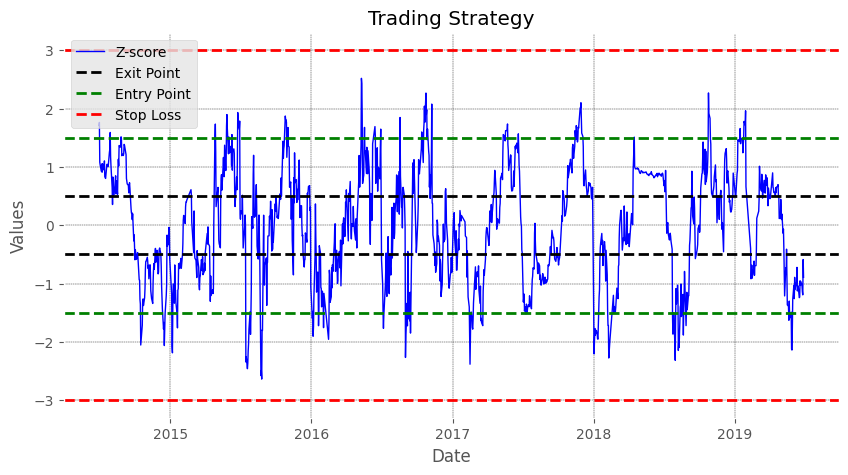

,portfolio,benchmark
Annualized Returns,73.61,None
Annualized Standard Deviation,52.44,None
Sharpe Ratio,1.40,None
Sortino Ratio,1.41,None
Annualized VaR 95%,-0.27,None
Annualized CVaR 95%,-0.82,None
Worst Drawdown,-0.11,None


In [75]:
# Define signals
entry_point = 1.5
exit_point = 0.5
stop_loss = 3

# Define an empty dictionary to store the results
strategy = {}
portfolio = {}
weights = {} 

for i in range(1, len(inSample)+1):

    cointegrated = False

    clustering = StockClustering(n_components=3, min_samples=2, max_cluster_size=10)
    clustering.fit(inSample[i])
    clusters = clustering.get_cluster_stocks()  # 獲取所有群集
    
    print('Imsample',i)
    # 根據 key 的數值進行排序
    sorted_clusters = dict(sorted(clusters.items()))
    # 印出排序後的字典
    for cluster_id, stocks in sorted_clusters.items():
        print(f"Cluster ID: {cluster_id}, Stocks: {stocks}")

    for cluster_id in sorted(clusters.keys()):  # 按照群集編號順序檢查
        selected_columns = clusters[cluster_id]
        _inSample = inSample[i][selected_columns]
        # 樣本外的資料已經沒有該cluster中的某股票，則跳過，進入下一個cluster
        try:
            _outofSample = outofSample[i][selected_columns]
        except KeyError as e:
            print(f"KeyError for cluster {cluster_id} at index {i}: {e}")
            continue  # 跳過這次迴圈

        # Test for cointegration
        coint = Johansen(_inSample).n_coint_vectors()
        
        if coint >= 1:
            # Run backtest
            backtest = Backtest(
                inSample=_inSample, 
                outofSample=_outofSample, 
                entry_point=entry_point, 
                exit_point=exit_point, 
                stop_loss=stop_loss
            )
            strategy[i] = pd.DataFrame({"Z-score": backtest.z_score()}, index=_outofSample.index)
            portfolio[i] = backtest.port_rtn()
            weights[i] = pd.DataFrame(
                {"Asset": selected_columns, "Weight": backtest.weight()}, 
                index=[i]*len(selected_columns)  # 使用實際選擇的股票數量
            )
            print('Choice cluster',cluster_id)
            print('------------------------------------------------------------------------')
            cointegrated = True
            break  # 找到共整合的群集後立即退出循環

    # 如果所有群集都沒有共整合關係，設置空的投資組合
    if not cointegrated:
        portfolio[i] = pd.DataFrame([0] * len(_outofSample), index=_outofSample.index)

# concatenate all DataFrames into a single DataFrame
strategy = pd.concat(strategy.values(), axis=0)  
portfolio = pd.concat(portfolio.values(), axis=0)  # 日報酬
weights = pd.concat(weights.values(), axis=0)  # 每組投資組合及權重

# Plot z-score and signals
# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(strategy.index, strategy.iloc[:,0], label='Z-score', color='blue', linewidth=1)
ax.axhline(y=-exit_point, color='black', linestyle='--', linewidth=2, label='Exit Point')
ax.axhline(y=exit_point, color='black', linestyle='--', linewidth=2)
ax.axhline(y=-entry_point, color='green', linestyle='--', linewidth=2, label='Entry Point')
ax.axhline(y=entry_point, color='green', linestyle='--',linewidth=2)
ax.axhline(y=-stop_loss, color='red', linestyle='--', linewidth=2, label='Stop Loss')
ax.axhline(y=stop_loss, color='red', linestyle='--', linewidth=2)
ax.set_ylabel('Values')
ax.set_xlabel('Date')
ax.set_facecolor('white')
ax.grid(color='black', linestyle='--', linewidth=0.3)
ax.set_title("Trading Strategy")
ax.legend()
plt.show()
performance = Performance(portfolio=portfolio)
performance.summary_table()

### Parameter optimization

In [76]:
# results = []
# for entry_point in np.arange(1, 2.5, 0.5):
#     for exit_point in np.arange(0, 1.5, 0.5):
#         for stop_loss in np.arange(2, 3.5, 0.5):
#             for n_component in range(2, 6, 1):
#                 for min_sample in range(2, 8, 1):
#                     entry_point = np.round(entry_point, 1)
#                     exit_point = np.round(exit_point, 1)
#                     stop_loss = np.round(stop_loss, 1)
#                     print('----------')
#                     print(f'entry_point: {entry_point}')
#                     print(f'exit_point: {exit_point}')
#                     print(f'stop_loss: {stop_loss}')
#                     print(f'n_component: {n_component}')
#                     print(f'min_sample: {min_sample}')
    
#                     # Define an empty dictionary to store the results
#                     strategy = {}
#                     portfolio = {}
#                     weights = {} 

#                     for i in range(1, len(inSample)+1):
#                         cointegrated = False

#                         clustering = StockClustering(n_components=n_component, min_samples=min_sample, max_cluster_size=10)
#                         clustering.fit(inSample[i])
#                         clusters = clustering.get_cluster_stocks()  # 獲取所有群集
                        
#                         for cluster_id in sorted(clusters.keys()):  # 按照群集編號順序檢查
#                             selected_columns = clusters[cluster_id]
#                             _inSample = inSample[i][selected_columns]
#                             # 樣本外的資料已經沒有該cluster中的某股票，則跳過，進入下一個cluster
#                             try:
#                                 _outofSample = outofSample[i][selected_columns]
#                             except KeyError as e:
#                                 continue  # 跳過這次迴圈

#                             # Test for cointegration
#                             coint = Johansen(_inSample).n_coint_vectors()
                            
#                             if coint >= 1:
#                                 # Run backtest
#                                 backtest = Backtest(
#                                     inSample=_inSample, 
#                                     outofSample=_outofSample, 
#                                     entry_point=entry_point, 
#                                     exit_point=exit_point, 
#                                     stop_loss=stop_loss
#                                 )
#                                 strategy[i] = pd.DataFrame({"Z-score": backtest.z_score()}, index=_outofSample.index)
#                                 portfolio[i] = backtest.port_rtn()
#                                 weights[i] = pd.DataFrame(
#                                     {"Asset": selected_columns, "Weight": backtest.weight()}, 
#                                     index=[i]*len(selected_columns)
#                                 )
                                
#                                 cointegrated = True
#                                 break  # 找到共整合的群集後立即退出循環

#                         # 如果所有群集都沒有共整合關係，設置空的投資組合
#                         if not cointegrated:
#                             portfolio[i] = pd.DataFrame([0] * len(_outofSample), index=_outofSample.index)

#                     try:
#                         # concatenate all DataFrames into a single DataFrame
#                         portfolio_df = pd.concat(portfolio.values(), axis=0)  # 日報酬
                        
#                         # 計算績效指標
#                         performance = Performance(portfolio=portfolio_df)
#                         metrics = performance.summary_table()
                        
#                         # 儲存結果
#                         results.append({
#                             'entry_point': entry_point,
#                             'exit_point': exit_point,
#                             'stop_loss': stop_loss,
#                             'n_components': n_component,
#                             'min_samples': min_sample,
#                             'annual_return': metrics.iloc[0,0],
#                             'sharpe_ratio': metrics.iloc[2,0],
#                             'mdd': metrics.iloc[6,0]
#                         })
#                     except ValueError as ve:
#                         print(f"ValueError: {ve}")
#                     except KeyError as ke:
#                         print(f"KeyError: {ke}")
#                     except Exception as e:
#                         print(f"Unexpected error: {e}")
# # 將結果轉換為DataFrame並顯示
# results_df = pd.DataFrame(results)
# print("\nResults sorted by Annual Return:")
# print(results_df.sort_values('annual_return', ascending=False))

# # 儲存結果
# results_df.to_csv('parameter_optimization_results.csv', index=False)

Plotting return and drawdown

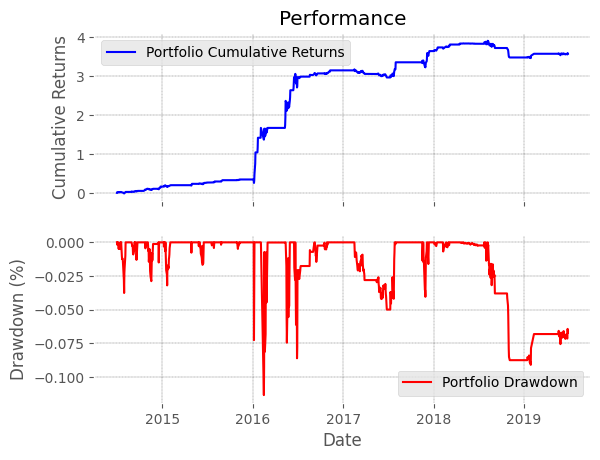

In [77]:
performance.plot_performance()

Save results

In [78]:
portfolio.to_csv('Portfolio_Return.csv', index=True)
weights.to_csv('Portfolio_Weights.csv', index=True)
performance.summary_table().to_csv('Performance_Metrics.csv', index=True)